In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Avg Number of stops

In [2]:
l_nstops = pd.read_csv('gen/l_nstops.csv')

In [3]:
l_nstops = l_nstops.set_index('Route')

In [4]:
d_nstops = pd.read_csv('gen/d_nstops2.csv')

In [5]:
d_nstops = d_nstops.set_index('route_id')

In [6]:
d_nstops['City'] = 'Delhi'

In [7]:
l_nstops['City'] = 'London'

In [8]:
d_nstops.rename(columns={'0': 'Stops'}, inplace=True)

In [9]:
l_nstops.rename(columns={'Stop_Code_LBSL': 'Stops'}, inplace=True)

In [10]:
nstops = pd.merge(d_nstops, l_nstops, on='City', how='outer')
nstops

,Stops_x,City,Stops_y
0,20.0,Delhi,NaN
1,46.0,Delhi,NaN
2,7.0,Delhi,NaN
3,28.0,Delhi,NaN
4,31.0,Delhi,NaN
...,...,...,...
1955,NaN,London,73.0
1956,NaN,London,37.0
1957,NaN,London,26.0
1958,NaN,London,28.0


In [11]:
nstops.shape

(1960, 3)

In [12]:
d_nstops.shape[0] + l_nstops.shape[0]

1960

In [13]:
cols = ['Stops_x', 'Stops_y']
nstops = nstops.assign(value=nstops[cols].sum(1)).drop(labels=cols, axis=1)

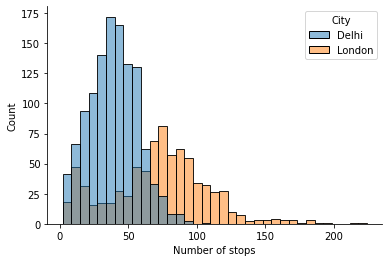

In [14]:
_, ax = plt.subplots()
sns.histplot(data=nstops, ax=ax, x='value', hue='City')
sns.despine()
plt.xlabel('Number of stops')
plt.savefig('figures/nstops.png')

# Route lengths

In [15]:
l_rlengths = pd.read_csv('gen/l_rlengths.csv')

In [16]:
d_rlengths = pd.read_csv('gen/d_rlengths2.csv')

In [17]:
d_rlengths['City'] = 'Delhi'

In [18]:
l_rlengths['City'] = 'London'

In [19]:
d_rlengths.rename(columns={'0': 'Length'}, inplace=True)

In [20]:
l_rlengths.rename(columns={'0': 'Length'}, inplace=True)

In [21]:
lengths = pd.merge(d_rlengths[['City', 'Length']], l_rlengths[['City', 'Length']], on='City', how='outer')
lengths

,City,Length_x,Length_y
0,Delhi,12877.486982,NaN
1,Delhi,30744.084545,NaN
2,Delhi,8262.196860,NaN
3,Delhi,22570.834831,NaN
4,Delhi,18806.029158,NaN
...,...,...,...
2729,London,NaN,14821.371159
2730,London,NaN,30937.166032
2731,London,NaN,31094.572755
2732,London,NaN,17299.840987


In [22]:
lengths.shape

(2734, 3)

In [23]:
d_rlengths.shape[0] + l_rlengths.shape[0]

2734

In [24]:
cols = ['Length_x', 'Length_y']
lengths = lengths.assign(value=lengths[cols].sum(1)).drop(labels=cols, axis=1)

In [25]:
lengths['value'] = lengths.value / 1000

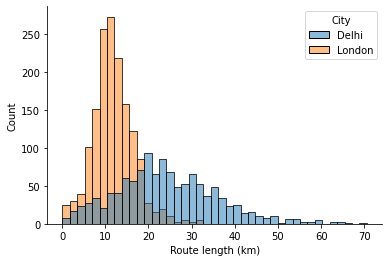

In [26]:
_, ax = plt.subplots()
sns.histplot(data=lengths, ax=ax, x='value', hue='City')
sns.despine()
plt.xlabel('Route length (km)')
plt.savefig('figures/rlengths.png')

# Centrality

In [2]:
l_c = pd.read_csv('gen/london_c.csv')

In [3]:
d_c = pd.read_csv('gen/delhi_c.csv')

In [4]:
d_c['City'] = 'Delhi'

In [5]:
l_c['City'] = 'London'

In [6]:
cc = pd.merge(d_c[['City', 'closeness_global']], l_c[['City', 'closeness_global']], on='City', how='outer')
cc

,City,closeness_global_x,closeness_global_y
0,Delhi,0.000027,NaN
1,Delhi,0.000028,NaN
2,Delhi,0.000026,NaN
3,Delhi,0.000026,NaN
4,Delhi,0.000025,NaN
...,...,...,...
31470,London,NaN,3.951317e-06
31471,London,NaN,4.187270e-06
31472,London,NaN,1.062751e-07
31473,London,NaN,1.049299e-06


In [7]:
cc.shape

(31475, 3)

In [8]:
d_c.shape[0]

5802

In [9]:
l_c.shape[0]

25673

In [10]:
d_c.shape[0] + l_c.shape[0]

31475

In [11]:
cols = ['closeness_global_x', 'closeness_global_y']
cc = cc.assign(value=cc[cols].sum(1)).drop(labels=cols, axis=1)

In [12]:
cc['value'] = cc.value / 1000

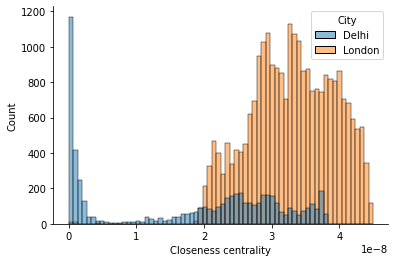

In [13]:
_, ax = plt.subplots()
sns.histplot(data=cc, ax=ax, x='value', hue='City')
sns.despine()
plt.xlabel('Closeness centrality')
plt.savefig('figures/cc.png')